# Optimisation Methods

* Analytical Solution: There is a closed from solution to the problem.
* MCMC: Gather samples from the posterior P(theta|x,y) and then make conclusions about theta.
    * Gibbs sampling (we can run an example of) (needs to be derived)
    * Metropolice Hastings.
    * Hamiltonian MC.
    * NUTS.
* Variational Inference (EM being a special case thereof). This is supposed to be faster than MCMC but only single point estimates, not samples.
    * Apporximate the posterior P(theta|x,y) with a simpler, factorised distribution which will miss the correlation properties of the posterior. But you will still get insite about each variable (like MAP).

# MCMC
    * Gibbs sampling: Difficult to sample from P(theta|x,y).
    * Then sample from P(theta1|x,y,theta2-n) and then P(theta2|x,y,theta1 and thata3-n) etc

## Gibbs Sampling

In [130]:
np_samples = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], 1000)

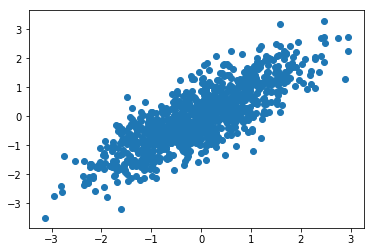

In [131]:
plt.scatter(np_samples.T[0], np_samples.T[1])
plt.show()

In [138]:
def gibbs_bi_gaussian(iter=2000, rho=1, skip=0):
    samples = []
    x = 0
    y = 0
    for i in range(iter):
        std = np.sqrt(1 - rho ** 2)
        x = np.random.normal(loc=y * rho, scale=std)
        y = np.random.normal(loc=x * rho, scale=std)
        samples.append([x, y])
    if skip > 1:
        samples = samples[::int(skip)]
    return np.array(samples)

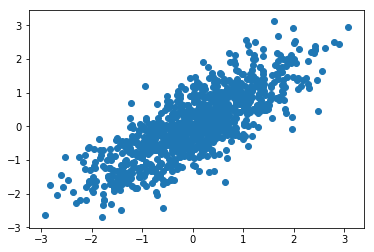

In [141]:
gibbs_samples = gibbs_bi_gaussian(iter=2000, rho=0.8, skip=2)
plt.scatter(gibbs_samples.T[0], gibbs_samples.T[1])
plt.show()

In [36]:
import numpy as np
import pystan as ps
import matplotlib.pyplot as plt

# Generate Data

In [32]:
alpha = 5.5 # Slope
beta  = 3   # Intercept
std   = 1   # STD of error

In [33]:
x = np.random.normal(loc=0, scale=1, size=1000)

In [34]:
y = x * alpha + beta + np.random.normal(loc=0, scale=1, size=1000)

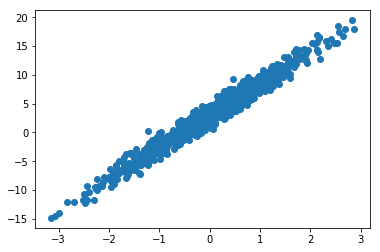

In [35]:
plt.scatter(x=x, y=y)
plt.show()

# Model

In [80]:
linear_regression_model = """
data {
    int N;     // number of data points
    real x[N]; // Input data (predictor)
    real y[N]; // Output data (predicted)
}
parameters {
    real a; // Slope
    real b; // Intercept
    real s; // STD of error
}
model {
    b ~ normal(0, 20);
    a ~ normal(0, 20);
    s ~ inv_gamma(5, 3);
    for (i in 1:N) {
        y[i] ~ normal(x[i] * a + b, s);
    }
}
"""

In [81]:
# Compile the model
model = ps.StanModel(model_code=linear_regression_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d66d12dca4d26fa9d6cc1491b9211778 NOW.


In [99]:
%%time

# Run with data
sam = model.sampling(data={
    'N': len(x),
    'x': x,
    'y': y
})

C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 4.85 s


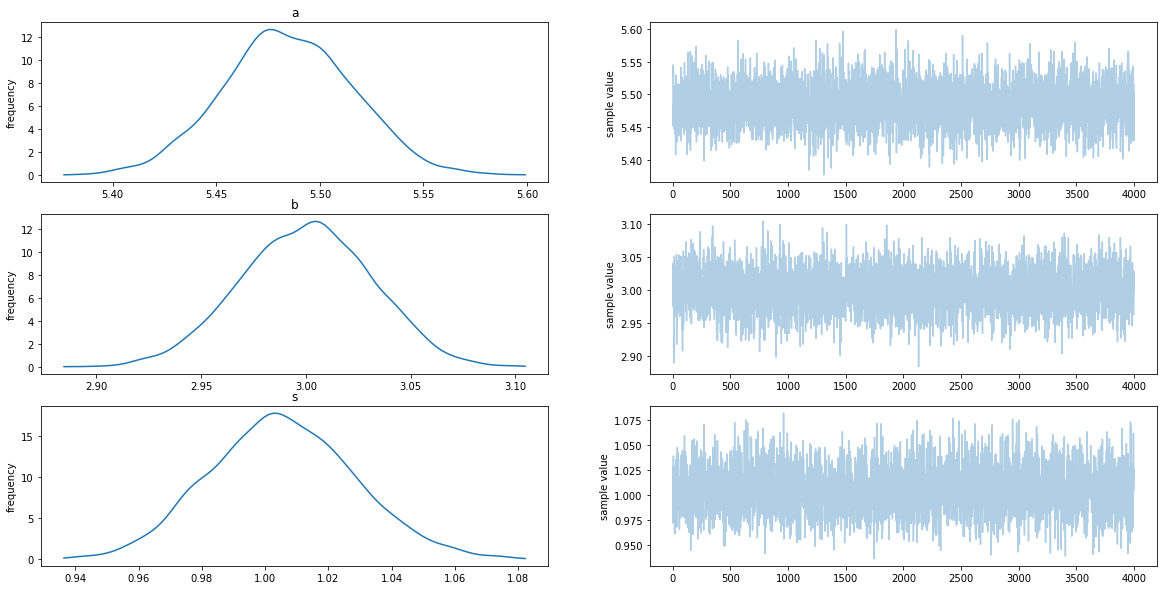

In [100]:
# Plot
ax = sam.plot()
ax.set_size_inches(20, 10)
ax

# Variational Bayes (VB)

In [107]:
%%time

# Variational Bayes
fit = model.vb(data={
    'N': len(x),
    'x': x,
    'y': y
}, iter=2000)

C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 103 ms


In [112]:
fit['mean_pars']

[5.491631444391033, 3.0165170719673426, 1.047846905333702]